#NAMA : Mitra Marona Putra Gurusinga
#BATCH HCK 0006
#MILESTONE 1

Berikut adalah link untuk dashboard dari Milestone ini
https://lookerstudio.google.com/s/kBx02Hyy5ho

In [ ]:
#melakukan import pustaka yang diperlukan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
#melakukan upload data
df = pd.read_csv('/content/Churn Modeling.csv')

In [3]:
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [4]:
#melihat 10 baris data pertama
df.head(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2,134603.88,1,1,1,71725.73,0


In [5]:
#melihat info dari tipe data dan banyak data tabel
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [6]:
#memeriksa kolom tabel
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [7]:
#memeriksa missing values setiap kolom
df.isna().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [8]:
#memeriksa nilai 0 di setiap kolom
df.isin([0]).sum()

RowNumber             0
CustomerId            0
Surname               0
CreditScore           0
Geography             0
Gender                0
Age                   0
Tenure              413
Balance            3617
NumOfProducts         0
HasCrCard          2945
IsActiveMember     4849
EstimatedSalary       0
Exited             7963
dtype: int64

In [9]:
#memeriksa jumlah nilai creditscore unik
len(df.CreditScore.unique())

460

In [10]:
#memeriksa keseluruhan elemen unik per kolom
df.nunique()

RowNumber          10000
CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64

In [11]:
#melihat nilai unik di kolom Exited
df.Exited.unique()

array([1, 0])

In [12]:
#melihat elemen unik di kolom geography
df.Geography.unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [13]:
#melakukan penambahan kolom status dari nilai 0 dan 1 di kolom Exited
df['Status'] = df['Exited'].apply(lambda x: 'Exited' if x == 1 else 'Stay')

In [14]:
#melakukan penambahan kolom Exited_01 dari nilai Exited dan Stay di kolom Status
df['Exited_01'] = df['Status'].apply(lambda x: 1 if x == 'Exited' else 0)

In [16]:
#melakukan penambahan kolom crCARD dari nilai 0 dan 1 kolom HasCrCard
df['CrCard'] = df['HasCrCard'].apply(lambda x: 'Has' if x == 1 else 'NoCard')

In [17]:
#melakukan penambahan kolom CrCard_01 dari nilai Has dan NoCard di kolom CrCard
df['CrCard_01'] = df['CrCard'].apply(lambda x: 1 if x == 'Has' else 0 )

In [19]:
#melakukan penambahan kolom Member dari nilai 0 dan 1 kolom IsActiveMember
df['Member'] = df['IsActiveMember'].apply(lambda x: 'Member' if x == 1 else 'NoMember')

In [20]:
#melakukan penambahan kolom Member_01 dari nilai Member dan NoMember di kolom Member
df['Member_01'] = df['Member'].apply(lambda x: 1 if x == 'Member' else 0 )

In [23]:
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,EstimatedSalary,Status,Exited_01,CrCard,CrCard_01,Member,Member_01
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,101348.88,Exited,1,Has,1,Member,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,112542.58,Stay,0,NoCard,0,Member,1
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,113931.57,Exited,1,Has,1,NoMember,0
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,93826.63,Stay,0,NoCard,0,NoMember,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,79084.10,Stay,0,Has,1,Member,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,96270.64,Stay,0,Has,1,NoMember,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,101699.77,Stay,0,Has,1,Member,1
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,42085.58,Exited,1,NoCard,0,Member,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,92888.52,Exited,1,Has,1,NoMember,0


In [22]:
#membuang kolom yang tidak lagi diperlukan
df = df.drop(['HasCrCard', 'IsActiveMember', 'Exited'], axis=1)

In [26]:
#memisahkan masing-masing gender di masing-masing negara
dfFRM = df[(df['Geography']=='France') & (df['Gender']=='Male')]
dfFRM

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,EstimatedSalary,Status,Exited_01,CrCard,CrCard_01,Member,Member_01
6,7,15592531,Bartlett,822,France,Male,50,7,0.00,2,10062.80,Stay,0,Has,1,Member,1
8,9,15792365,He,501,France,Male,44,4,142051.07,2,74940.50,Stay,0,NoCard,0,Member,1
9,10,15592389,H?,684,France,Male,27,2,134603.88,1,71725.73,Stay,0,Has,1,Member,1
10,11,15767821,Bearce,528,France,Male,31,6,102016.72,2,80181.12,Stay,0,NoCard,0,NoMember,0
20,21,15577657,McDonald,732,France,Male,41,8,0.00,2,170886.17,Stay,0,Has,1,Member,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9985,9986,15586914,Nepean,659,France,Male,36,6,123841.49,2,96833.00,Stay,0,Has,1,NoMember,0
9988,9989,15589329,Pirozzi,775,France,Male,30,4,0.00,2,49337.84,Stay,0,Has,1,NoMember,0
9993,9994,15569266,Rahman,644,France,Male,28,7,155060.41,1,29179.52,Stay,0,Has,1,NoMember,0
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,96270.64,Stay,0,Has,1,NoMember,0


In [27]:
#memisahkan masing-masing gender di masing-masing negara
dfFRF = df[(df['Geography']=='France') & (df['Gender']=='Female')]
dfFRF

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,EstimatedSalary,Status,Exited_01,CrCard,CrCard_01,Member,Member_01
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,101348.88,Exited,1,Has,1,Member,1
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,113931.57,Exited,1,Has,1,NoMember,0
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,93826.63,Stay,0,NoCard,0,NoMember,0
12,13,15632264,Kay,476,France,Female,34,10,0.00,2,26260.98,Stay,0,Has,1,NoMember,0
13,14,15691483,Chin,549,France,Female,25,5,0.00,2,190857.79,Stay,0,NoCard,0,NoMember,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9979,9980,15692664,Diribe,677,France,Female,58,1,90022.85,1,2988.28,Stay,0,NoCard,0,Member,1
9991,9992,15769959,Ajuluchukwu,597,France,Female,53,4,88381.21,1,69384.71,Exited,1,Has,1,NoMember,0
9994,9995,15719294,Wood,800,France,Female,29,2,0.00,2,167773.55,Stay,0,NoCard,0,NoMember,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,42085.58,Exited,1,NoCard,0,Member,1


In [28]:
#memisahkan masing-masing gender di masing-masing negara
dfSM = df[(df['Geography']=='Spain') & (df['Gender']=='Male')]
dfSM

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,EstimatedSalary,Status,Exited_01,CrCard,CrCard_01,Member,Member_01
5,6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,149756.71,Exited,1,Has,1,NoMember,0
11,12,15737173,Andrews,497,Spain,Male,24,3,0.00,2,76390.01,Stay,0,Has,1,NoMember,0
18,19,15661507,Muldrow,587,Spain,Male,45,6,0.00,1,158684.81,Stay,0,NoCard,0,NoMember,0
36,37,15788448,Watson,490,Spain,Male,31,3,145260.23,1,114066.77,Stay,0,NoCard,0,Member,1
37,38,15729599,Lorenzo,804,Spain,Male,33,7,76548.60,1,98453.45,Stay,0,NoCard,0,Member,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9966,9967,15590213,Ch'en,479,Spain,Male,35,4,125920.98,1,20393.44,Stay,0,Has,1,Member,1
9980,9981,15719276,T'ao,741,Spain,Male,35,6,74371.49,1,99595.67,Stay,0,NoCard,0,NoMember,0
9987,9988,15588839,Mancini,606,Spain,Male,30,8,180307.73,2,1914.41,Stay,0,Has,1,Member,1
9989,9990,15605622,McMillan,841,Spain,Male,28,4,0.00,2,179436.60,Stay,0,Has,1,Member,1


In [29]:
#memisahkan masing-masing gender di masing-masing negara
dfSF = df[(df['Geography']=='Spain') & (df['Gender']=='Female')]
dfSF

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,EstimatedSalary,Status,Exited_01,CrCard,CrCard_01,Member,Member_01
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,112542.58,Stay,0,NoCard,0,Member,1
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,79084.10,Stay,0,Has,1,Member,1
14,15,15600882,Scott,635,Spain,Female,35,7,0.00,2,65951.65,Stay,0,Has,1,Member,1
17,18,15788218,Henderson,549,Spain,Female,24,9,0.00,2,14406.41,Stay,0,Has,1,Member,1
21,22,15597945,Dellucci,636,Spain,Female,32,8,0.00,2,138555.46,Stay,0,Has,1,NoMember,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9904,9905,15722532,Angelo,690,Spain,Female,36,10,91760.11,1,135784.94,Stay,0,Has,1,Member,1
9912,9913,15655903,Michael,701,Spain,Female,34,6,107980.37,1,119374.74,Stay,0,Has,1,Member,1
9916,9917,15770516,Evdokimov,616,Spain,Female,44,7,193213.02,2,137392.77,Stay,0,Has,1,Member,1
9938,9939,15593496,Korovin,526,Spain,Female,36,5,91132.18,1,58111.71,Stay,0,NoCard,0,NoMember,0


In [30]:
#memisahkan masing-masing gender di masing-masing negara
dfGM = df[(df['Geography']=='Germany') & (df['Gender']=='Male')]
dfGM

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,EstimatedSalary,Status,Exited_01,CrCard,CrCard_01,Member,Member_01
15,16,15643966,Goforth,616,Germany,Male,45,3,143129.41,2,64327.26,Stay,0,NoCard,0,Member,1
16,17,15737452,Romeo,653,Germany,Male,58,1,132602.88,1,5097.67,Exited,1,Has,1,NoMember,0
26,27,15736816,Young,756,Germany,Male,36,2,136815.64,1,170041.95,Stay,0,Has,1,Member,1
32,33,15750181,Sanderson,553,Germany,Male,41,9,110112.54,2,81898.81,Stay,0,NoCard,0,NoMember,0
39,40,15585768,Cameron,582,Germany,Male,41,6,70349.48,2,178074.04,Stay,0,NoCard,0,Member,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9981,9982,15672754,Burbidge,498,Germany,Male,42,3,152039.70,1,53445.17,Exited,1,Has,1,Member,1
9984,9985,15696175,Echezonachukwu,602,Germany,Male,35,7,90602.42,2,51695.41,Stay,0,Has,1,Member,1
9986,9987,15581736,Bartlett,673,Germany,Male,47,1,183579.54,2,34047.54,Stay,0,NoCard,0,Member,1
9990,9991,15798964,Nkemakonam,714,Germany,Male,33,3,35016.60,1,53667.08,Stay,0,Has,1,NoMember,0


In [31]:
#memisahkan masing-masing gender di masing-masing negara
dfGF = df[(df['Geography']=='Germany') & (df['Gender']=='Female')]
dfGF

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,EstimatedSalary,Status,Exited_01,CrCard,CrCard_01,Member,Member_01
7,8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,119346.88,Exited,1,Has,1,NoMember,0
28,29,15728693,McWilliams,574,Germany,Female,43,3,141349.43,1,100187.43,Stay,0,Has,1,Member,1
45,46,15754849,Tyler,776,Germany,Female,32,4,109421.13,2,126517.46,Stay,0,Has,1,Member,1
46,47,15602280,Martin,829,Germany,Female,27,9,112045.67,1,119708.21,Exited,1,Has,1,Member,1
47,48,15771573,Okagbue,637,Germany,Female,39,9,137843.80,1,117622.80,Exited,1,Has,1,Member,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9950,9951,15638494,Salinas,625,Germany,Female,39,10,129845.26,1,96444.88,Stay,0,Has,1,Member,1
9960,9961,15681026,Lucciano,795,Germany,Female,33,9,104552.72,1,120853.83,Exited,1,Has,1,Member,1
9965,9966,15690164,Shao,627,Germany,Female,33,4,83199.05,1,159334.93,Stay,0,NoCard,0,NoMember,0
9968,9969,15733491,McGregor,512,Germany,Female,40,8,153537.57,2,23101.13,Stay,0,NoCard,0,NoMember,0


#ASUMSI

Saya adalah seorang analis data yang diminta menganalisa penyebab churn nasabah di sebuah Bank Hacktiv8 di Eropa yang mempunyai cabang di Spanyol, Prancis, dan Jerman berdasarkan data nasabah.

#PROBLEM STATEMENT

Menganalisa faktor-faktor penyebab churn nasabah di bank Hacktiv8 di setiap negara melalui analisis data berdasarkan variabel usia, skor kredit, geografi, keanggotaan aktif, kepemilikan kartu kredit, jumlah produk, saldo akun, dan estimasi gaji, sebagai insight yang bermanfaat dalam mengurangi churn nasabah dan meningkatkan retensi nasabah .

#POIN PENJABARAN


#1. Bagaimana Komposisi Nasabah Bank Berdasarkan Gender di Masing-masing Negara?

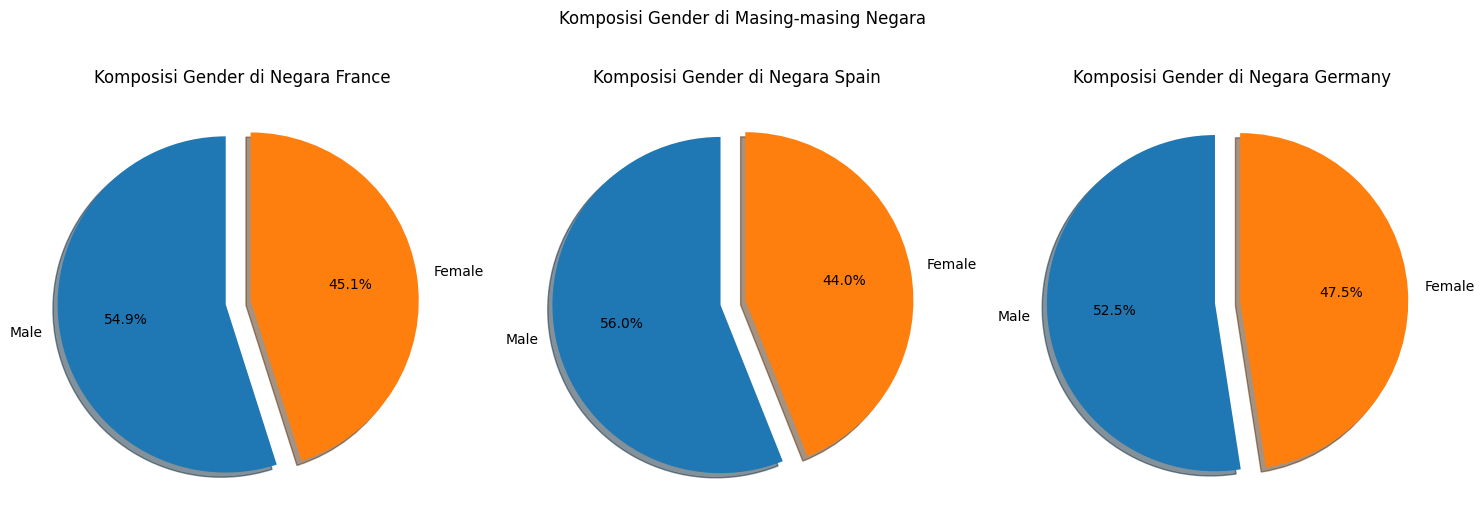

In [ ]:
#mengambil data male dan female untuk setiap elemen kolom geography
male_pie = df[df['Gender'] == 'Male']['Geography'].value_counts()
female_pie = df[df['Gender'] == 'Female']['Geography'].value_counts()

#mengatur posisi dan letak plot gambar
fig, axs = plt.subplots(1, len(negara), figsize=(15, 5), sharey=True)

#melakukan loop untuk memplot setiap negara beserta seluruh keterangan plot dan menambahkan efek explode pada pie chart
for i, country in enumerate(negara):
    labels = ['Male', 'Female']
    sizes_pie = [male_pie[country], female_pie[country]]
    explode = (0.1, 0.05)

    axs[i].pie(sizes_pie, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
    axs[i].set_title(f'Komposisi Gender di Negara {country}')
#menambahkan judul dari keseluruhan plot dan mengatur layout
plt.suptitle('Komposisi Gender di Masing-masing Negara', y=1.05)
plt.tight_layout()
plt.show()



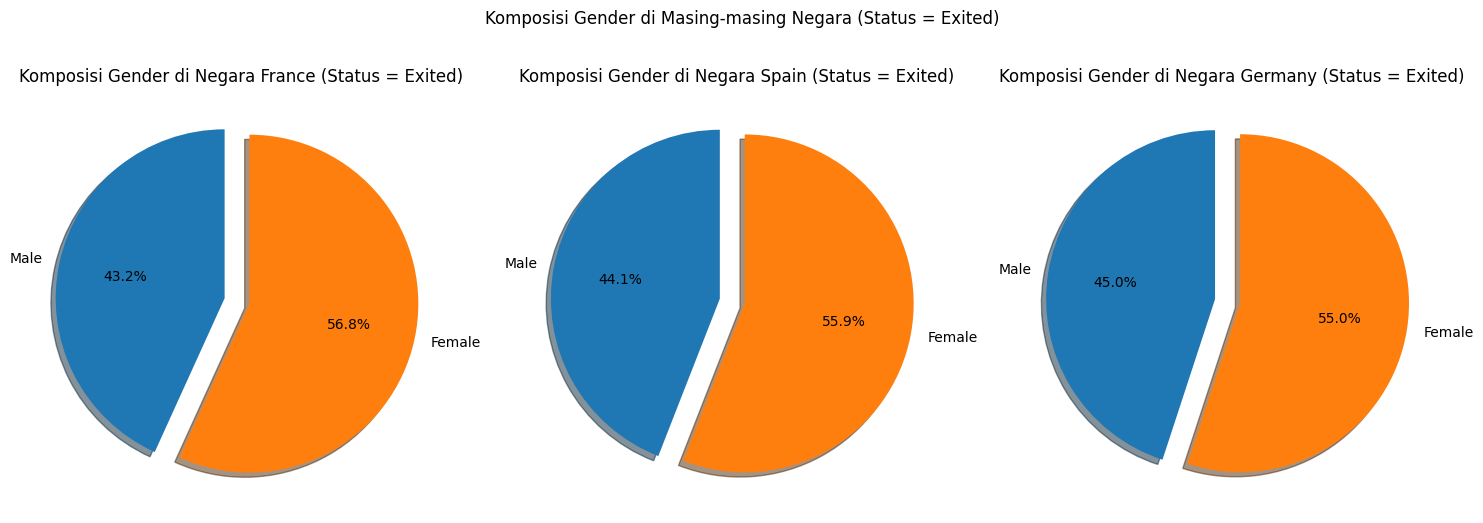

In [ ]:
#mengambil data male dan female untuk setiap elemen kolom geography dengan status Exited
male_pie_exited = df[(df['Gender'] == 'Male') & (df['Status'] == 'Exited')]['Geography'].value_counts()
female_pie_exited = df[(df['Gender'] == 'Female') & (df['Status'] == 'Exited')]['Geography'].value_counts()

#mengatur posisi dan letak plot gambar
fig, axs = plt.subplots(1, len(negara), figsize=(15, 5), sharey=True)

#melakukan loop untuk memplot setiap negara beserta seluruh keterangan plot dan menambahkan efek explode pada pie chart
for i, country in enumerate(negara):
    labels = ['Male', 'Female']
    sizes_pie_exited = [male_pie_exited[country], female_pie_exited[country]]
    explode = (0.1, 0.05)

    axs[i].pie(sizes_pie_exited, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
    axs[i].set_title(f'Komposisi Gender di Negara {country} (Status = Exited)')
#menambahkan judul dari keseluruhan plot dan mengatur layout
plt.suptitle('Komposisi Gender di Masing-masing Negara (Status = Exited)', y=1.05)
plt.tight_layout()
plt.show()


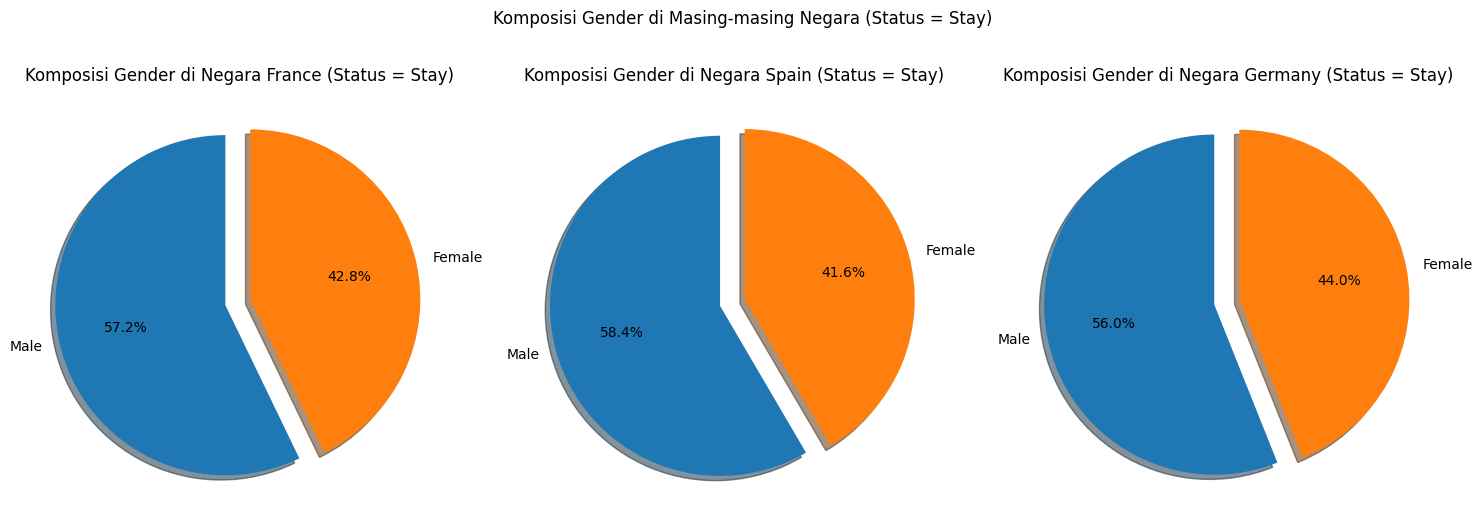

In [ ]:
#mengambil data male dan female untuk setiap elemen kolom geography dengan status Stay
male_pie_stay = df[(df['Gender'] == 'Male') & (df['Status'] == 'Stay')]['Geography'].value_counts()
female_pie_stay = df[(df['Gender'] == 'Female') & (df['Status'] == 'Stay')]['Geography'].value_counts()

#mengatur posisi dan letak plot gambar
fig, axs = plt.subplots(1, len(negara), figsize=(15, 5), sharey=True)

#melakukan loop untuk memplot setiap negara beserta seluruh keterangan plot dan menambahkan efek explode pada pie chart
for i, country in enumerate(negara):
    labels = ['Male', 'Female']
    sizes_pie_stay = [male_pie_stay[country], female_pie_stay[country]]
    explode = (0.1, 0.05)  # Menonjolkan potongan pertama (male)

    axs[i].pie(sizes_pie_stay, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
    axs[i].set_title(f'Komposisi Gender di Negara {country} (Status = Stay) ')
#menambahkan judul dari keseluruhan plot dan mengatur layout
plt.suptitle('Komposisi Gender di Masing-masing Negara (Status = Stay)', y=1.05)
plt.tight_layout()
plt.show()


Berdasarkan hasil filtering data dan plot grafik diagram batang di atas, ditemukan bahwa
1. Untuk di negara France, secara keseluruhan 54.9% nasabah Male dan 45.1% Female, di mana terdapat 43.2% nasabah Male dan 56.8% nasabah Female dengan status Exited. Sementara untuk status Stay, terdapat 57.2% nasabah Male dan 42.8% nasabah Female.
2. Untuk di negara Germany, secara keseluruhan 56% nasabah Male dan 44% Female, di mana terdapat 44.1% nasabah Male dan 55.9% nasabah Female dengan status Exited. Sementara untuk status Stay, terdapat 58.4% nasabah Male dan 41.6% nasabah Female.
3. Untuk di negara Spain, secara keseluruhan 52.5% nasabah Male dan 47.5% Female, di mana terdapat 45% nasabah Male dan 55% nasabah Female dengan status Exited. Sementara untuk status Stay, terdapat 56% nasabah Male dan 44% nasabah Female.

Dari hasil ini, dapat dilihat bahwa di setiap negara masing-masing didominasi gender Male, namun untuk status Exited masing-masing didominasi status Female


#2. Bagaimana perbandingan jumlah nasabah yang dengan status Exited dan Stay berdasarkan kategori negara dan gendernya?







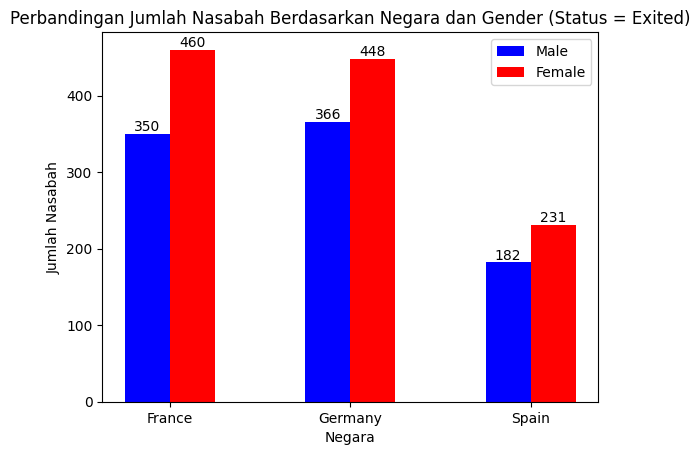

In [32]:
df_status = df.groupby(['Geography', 'Gender', 'Status']).size().unstack(fill_value=0)

#menjadikan list nama negara sebagai index
df_status_index = df_status.index.get_level_values('Geography').unique()

#memperoleh data jumlah nasabah yang Status Exited untuk kategori Male dan Female
male_status_exited = df_status['Exited'].loc[:, 'Male']
female_status_exited = df_status['Exited'].loc[:, 'Female']

#mempersiapkan untuk plot bar, menentukan lebar bar dan posisi bar
bar_width = 0.25
bar_male_status = np.arange(len(df_status_index))
bar_female_status = bar_male_status + bar_width

#melakukan plot diagram batang untuk kategori Male
plt.bar(bar_male_status, male_status_exited, color='blue', label='Male', width=bar_width)

#melakukan plot diagram batang untuk kategori Female
plt.bar(bar_female_status, female_status_exited, color='red', label='Female', width=bar_width)

#menambah keterangan nilai pada setiap bar batang dan mengatur posisinya
for i, v in enumerate(male_status_exited):
    plt.text(bar_male_status[i], v, str(v), ha='center', va='bottom', color='black')
for i, v in enumerate(female_status_exited):
    plt.text(bar_female_status[i], v, str(v), ha='center', va='bottom', color='black')

#menambahkan xlabel, ylabel dan judul plot
plt.xlabel('Negara')
plt.ylabel('Jumlah Nasabah')
plt.title('Perbandingan Jumlah Nasabah Berdasarkan Negara dan Gender (Status = Exited)')

#mengatur label x menjadi list negara sebelumnya
plt.xticks(bar_male_status + bar_width/2, df_status_index)
#menampilkan legend utk keterangan
plt.legend()
plt.show()

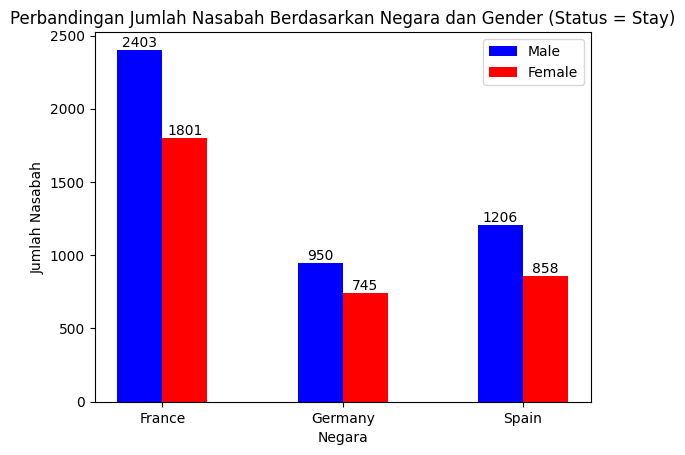

In [33]:
df_status = df.groupby(['Geography', 'Gender', 'Status']).size().unstack(fill_value=0)

#menjadikan list nama negara sebagai index
df_status_index = df_status.index.get_level_values('Geography').unique()

#memperoleh data jumlah nasabah yang Status Stay untuk kategori Male dan Female
male_status_stay = df_status['Stay'].loc[:, 'Male']
female_status_stay = df_status['Stay'].loc[:, 'Female']

#mempersiapkan untuk plot bar, menentukan lebar bar dan posisi bar
bar_width = 0.25
bar_male_status = np.arange(len(df_status_index))
bar_female_status = bar_male_status + bar_width

#melakukan plot diagram batang untuk kategori Male
plt.bar(bar_male_status, male_status_stay, color='blue', label='Male', width=bar_width)

#melakukan plot diagram batang untuk kategori Female
plt.bar(bar_female_status, female_status_stay, color='red', label='Female', width=bar_width)

#menambah keterangan nilai pada setiap bar batang dan mengatur posisinya
for i, v in enumerate(male_status_stay):
    plt.text(bar_male_status[i], v, str(v), ha='center', va='bottom', color='black')
for i, v in enumerate(female_status_stay):
    plt.text(bar_female_status[i], v, str(v), ha='center', va='bottom', color='black')

#menambahkan xlabel, ylabel dan judul plot
plt.xlabel('Negara')
plt.ylabel('Jumlah Nasabah')
plt.title('Perbandingan Jumlah Nasabah Berdasarkan Negara dan Gender (Status = Stay)')

#mengatur label x menjadi list negara sebelumnya
plt.xticks(bar_male_status + bar_width/2, df_status_index)
#menampilkan legend utk keterangan
plt.legend()
plt.show()

Berdasarkan hasil filtering data dan plot grafik diagram batang di atas, ditemukan bahwa
1. Untuk di negara France, terdapat 350 nasabah Male dan 460 nasabah Female dengan status Exited. Sementara untuk status Stay, terdapat 2403 nasabah Male dan 1801 nasabah Female.
2. Untuk di negara Germany, terdapat 366 nasabah Male dan 448 nasabah Female dengan status Exited. Sementara untuk status Stay, terdapat 950 nasabah Male dan 745 nasabah Female.
3. Untuk di negara Spain, terdapat 182 nasabah Male dan 231 nasabah Female dengan status Exited. Sementara untuk status Stay, terdapat 1206 nasabah Male dan 858 nasabah Female.

Dari hasil ini, dapat dilihat bahwa di setiap negara masing-masing didominasi gender Female untuk status Exited dan gender Male status Stay


#3. Bagaimana perbandingan jumlah nasabah Exited yang mempunyai Credit Card dan yang tidak berdasarkan kategori negara dan gendernya?

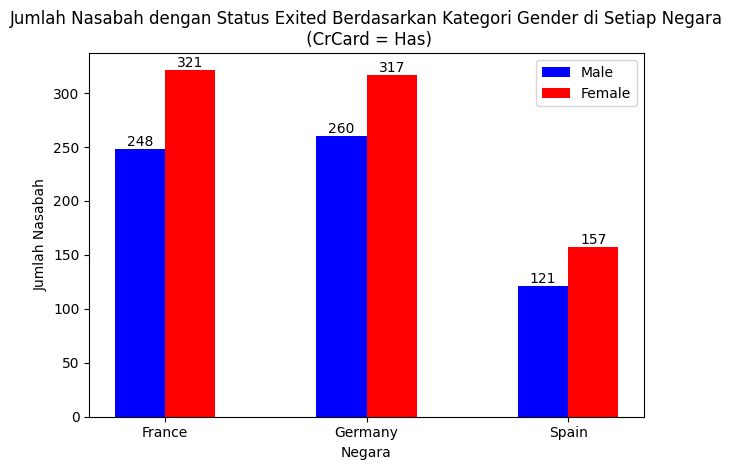

In [36]:
exited_has_card = df[(df['Status'] == 'Exited') & (df['CrCard'] == 'Has')]

#mengambil data nasabah berdasarkan negara, gender, dan yang mempunyai credit card
card_by_category = exited_has_card.groupby(['Geography', 'Gender']).size().unstack(fill_value=0)

#mendapatkan list negara dari tabel di atas
countries = card_by_category.index

#mendapatkan data nasabah untuk kategori Male dan Female
male_data_card = card_by_category['Male']
female_data_card = card_by_category['Female']

#mengatur panjang, lebar, dan posisi bar
bar_width = 0.25
bar_male_card = np.arange(len(countries))
bar_female_card = bar_male_card + bar_width

#melakukan plot diagram bar untuk kategori Male
plt.bar(bar_male_card, male_data_card, color='blue', label='Male', width=bar_width)

#melakukan plot diagram bar untuk kategori Male
plt.bar(bar_female_card, female_data_card, color='red', label='Female', width=bar_width)
#menambah keterangan nilai pada setiap bar batang dan mengatur posisinya
for i, v in enumerate(male_data_card):
    plt.text(i, v, str(v), ha='center', va='bottom', color='black')
for i, v in enumerate(female_data_card):
    plt.text(i + bar_width, v, str(v), ha='center', va='bottom', color='black')

#memberikan label dan judul plot
plt.xlabel('Negara')
plt.ylabel('Jumlah Nasabah')
plt.title('Jumlah Nasabah dengan Status Exited Berdasarkan Kategori Gender di Setiap Negara\n (CrCard = Has)')

#mengatur nama sumbu x menjadi list negara
plt.xticks(bar_male_card + bar_width / 2, countries)

#menambahkan keterangan legend dan mengatur layout
plt.legend()
plt.tight_layout()
plt.show()

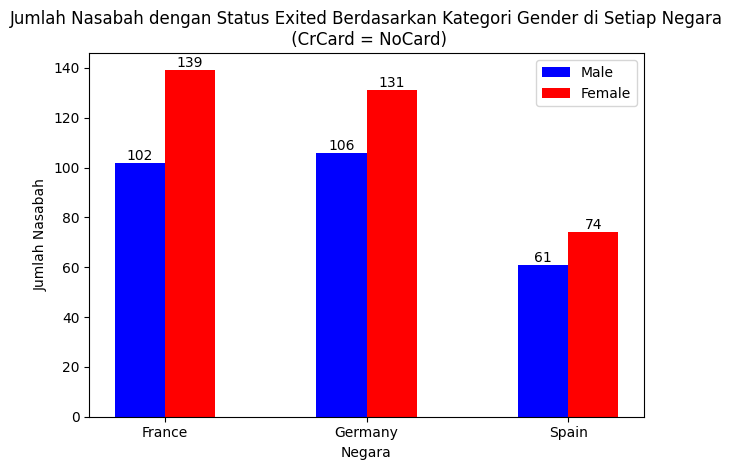

In [37]:
exited_no_card = df[(df['Status'] == 'Exited') & (df['CrCard'] == 'NoCard')]

#mengambil data nasabah berdasarkan negara, gender, dan yang tidak mempunyai credit card
nocard_by_category = exited_no_card.groupby(['Geography', 'Gender']).size().unstack(fill_value=0)

#mendapatkan list negara dari tabel di atas
countries_nocard = nocard_by_category.index

#mendapatkan data nasabah untuk kategori Male dan Female
male_data_nocard = nocard_by_category['Male']
female_data_nocard = nocard_by_category['Female']

#mengatur panjang, lebar, dan posisi bar
bar_width = 0.25
bar_male_nocard = np.arange(len(countries_nocard))
bar_female_nocard = bar_male_nocard + bar_width

#melakukan plot diagram bar untuk kategori Male
plt.bar(bar_male_nocard, male_data_nocard, color='blue', label='Male', width=bar_width)

#melakukan plot diagram bar untuk kategori Male
plt.bar(bar_female_nocard, female_data_nocard, color='red', label='Female', width=bar_width)
#menambah keterangan nilai pada setiap bar batang dan mengatur posisinya
for i, v in enumerate(male_data_nocard):
    plt.text(i, v, str(v), ha='center', va='bottom', color='black')
for i, v in enumerate(female_data_nocard):
    plt.text(i + bar_width, v, str(v), ha='center', va='bottom', color='black')

#memberikan label dan judul plot
plt.xlabel('Negara')
plt.ylabel('Jumlah Nasabah')
plt.title('Jumlah Nasabah dengan Status Exited Berdasarkan Kategori Gender di Setiap Negara\n (CrCard = NoCard)')

#mengatur nama sumbu x menjadi list negara
plt.xticks(bar_male_nocard + bar_width / 2, countries_nocard)

#menambahkan keterangan legend dan mengatur layout
plt.legend()
plt.tight_layout()
plt.show()

Berdasarkan hasil filtering data dan plot grafik diagram batang di atas, ditemukan bahwa
1. Untuk di negara France, terdapat 248 nasabah Male dan 321 nasabah Female dengan status Exited yang mempunyai Credit Card. Sementara untuk nasabah dengan status Exited yang tidak mempunyai credit card, terdapat 102 nasabah Male dan 139 nasabah Female.
2. Untuk di negara Germany, terdapat 260 nasabah Male dan 317 nasabah Female dengan status Exited yang mempunyai Credit Card. Sementara untuk nasabah dengan status Exited yang tidak mempunyai credit card, terdapat 106 nasabah Male dan 131 nasabah Female.
3. Untuk di negara Spain, terdapat 121 nasabah Male dan 157 nasabah Female dengan status Exited yang mempunyai Credit Card. Sementara untuk nasabah dengan status Exited yang tidak mempunyai credit card, terdapat 61 nasabah Male dan 74 nasabah Female.

Dari hasil ini, dapat dilihat bahwa lebih banyak dari nasabah masing-masing negara yang exited yang juga sudah punya credit card dibanding dengan nasabah yang belum punya credit card.


#4. Bagaimana perbandingan jumlah nasabah Exited yang Member dan yang tidak Member berdasarkan kategori negara dan gendernya?

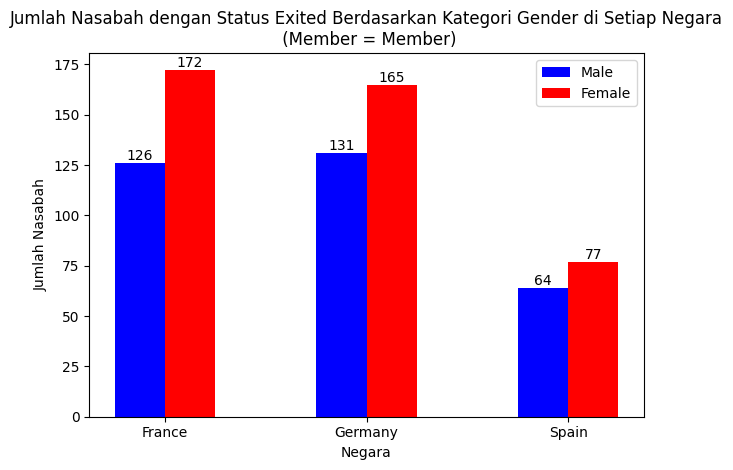

In [38]:

#melakukan filtering untuk data dengan status Exited dan Member berisi Member
exited_member = df[(df['Status'] == 'Exited') & (df['Member'] == 'Member')]

#mengambil data nasabah berdasarkan negara, gender, dan Member dan menghitung elemennya
member_by_category = exited_member.groupby(['Geography', 'Gender']).size().unstack(fill_value=0)

#membuat nama negara menjadi index
countries_member = member_by_category.index

#mendapatkan data nasabah untuk kategori Male dan Female untuk tabel di atas
male_data_member = member_by_category['Male']
female_data_member = member_by_category['Female']

#mengatur lebar, panjang, dan posisi bar
bar_width = 0.25
bar_male_member = np.arange(len(countries_member))
bar_female_member = bar_male_member + bar_width

#melakukan plot diagram bar untuk kategori Male dan mengatur warna, ukuran, dan keterangan
plt.bar(bar_male_member, male_data_member, color='blue', label='Male', width=bar_width)

#melakukan plot diagram bar untuk kategori Female dan mengatur warna, ukuran, dan keterangan
plt.bar(bar_female_member, female_data_member, color='red', label='Female', width=bar_width)
#menambah keterangan nilai pada setiap bar batang dan mengatur posisinya
for i, v in enumerate(male_data_member):
    plt.text(i, v, str(v), ha='center', va='bottom', color='black')
for i, v in enumerate(female_data_member):
    plt.text(i + bar_width, v, str(v), ha='center', va='bottom', color='black')

#mengatur nama xlabel, ylabel, dan judul plot
plt.xlabel('Negara')
plt.ylabel('Jumlah Nasabah')
plt.title('Jumlah Nasabah dengan Status Exited Berdasarkan Kategori Gender di Setiap Negara\n (Member = Member)')

#mengatur list sumbu x menjadi nama negara dan mengatur letaknya
plt.xticks(bar_male_member + bar_width / 2, countries_member)

#mengatur layout, menambahkan keterangan legend, dan menampilkan gambar
plt.legend()
plt.tight_layout()
plt.show()

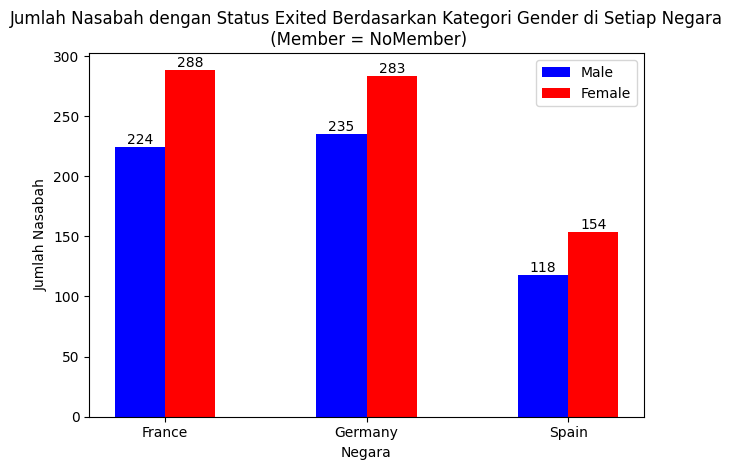

In [39]:

#melakukan filtering untuk data dengan status Exited dan Member berisi NoMember
exited_nomember = df[(df['Status'] == 'Exited') & (df['Member'] == 'NoMember')]

#mengambil data nasabah berdasarkan negara, gender, dan Member dan menghitung elemennya
nomember_by_category = exited_nomember.groupby(['Geography', 'Gender']).size().unstack(fill_value=0)

#membuat nama negara menjadi index
countries_nomember = nomember_by_category.index

#mendapatkan data nasabah untuk kategori Male dan Female untuk tabel di atas
male_data_nomember = nomember_by_category['Male']
female_data_nomember = nomember_by_category['Female']

#mengatur lebar, panjang, dan posisi bar
bar_width = 0.25
bar_male_nomember = np.arange(len(countries_nomember))
bar_female_nomember = bar_male_nomember + bar_width

#melakukan plot diagram bar untuk kategori Male dan mengatur warna, ukuran, dan keterangan
plt.bar(bar_male_nomember, male_data_nomember, color='blue', label='Male', width=bar_width)

#melakukan plot diagram bar untuk kategori Female dan mengatur warna, ukuran, dan keterangan
plt.bar(bar_female_nomember, female_data_nomember, color='red', label='Female', width=bar_width)

#menambah keterangan nilai pada setiap bar batang dan mengatur posisinya
for i, v in enumerate(male_data_nomember):
    plt.text(i, v, str(v), ha='center', va='bottom', color='black')
for i, v in enumerate(female_data_nomember):
    plt.text(i + bar_width, v, str(v), ha='center', va='bottom', color='black')

#mengatur nama xlabel, ylabel, dan judul plot
plt.xlabel('Negara')
plt.ylabel('Jumlah Nasabah')
plt.title('Jumlah Nasabah dengan Status Exited Berdasarkan Kategori Gender di Setiap Negara\n (Member = NoMember)')

#mengatur list sumbu x menjadi nama negara dan mengatur letaknya
plt.xticks(bar_male_nomember + bar_width / 2, countries_nomember)

#mengatur layout, menambahkan keterangan legend, dan menampilkan gambar
plt.legend()
plt.tight_layout()
plt.show()

Berdasarkan hasil filtering data dan plot grafik diagram batang di atas, ditemukan bahwa
1. Untuk di negara France, terdapat 126 nasabah Male dan 172 nasabah Female dengan status Exited yang memrupakan Member. Sementara untuk nasabah dengan status Exited yang tidak merupakan Member, terdapat 224 nasabah Male dan 288 nasabah Female.
2. Untuk di negara Germany, terdapat 131 nasabah Male dan 165 nasabah Female dengan status Exited yang memrupakan Member. Sementara untuk nasabah dengan status Exited yang tidak merupakan Member, terdapat 235 nasabah Male dan 283 nasabah Female.
3. Untuk di negara Spain, terdapat 64 nasabah Male dan 77 nasabah Female dengan status Exited yang mempunyai Credit Card. Sementara untuk nasabah dengan status Exited yang tidak mempunyai credit card, terdapat 118 nasabah Male dan 154 nasabah Female.

Dari hasil ini, dapat dilihat bahwa lebih banyak dari nasabah masing-masing negara yang exited yang bukan merupakan Member. Sehingga dapat diketahui bahwa Member bank rata-rata tidak memilih Exited


#5. Bagaimana sebaran usia nasabah yang dengan status Exited dan Stay berdasarkan kategori negara dan gendernya?

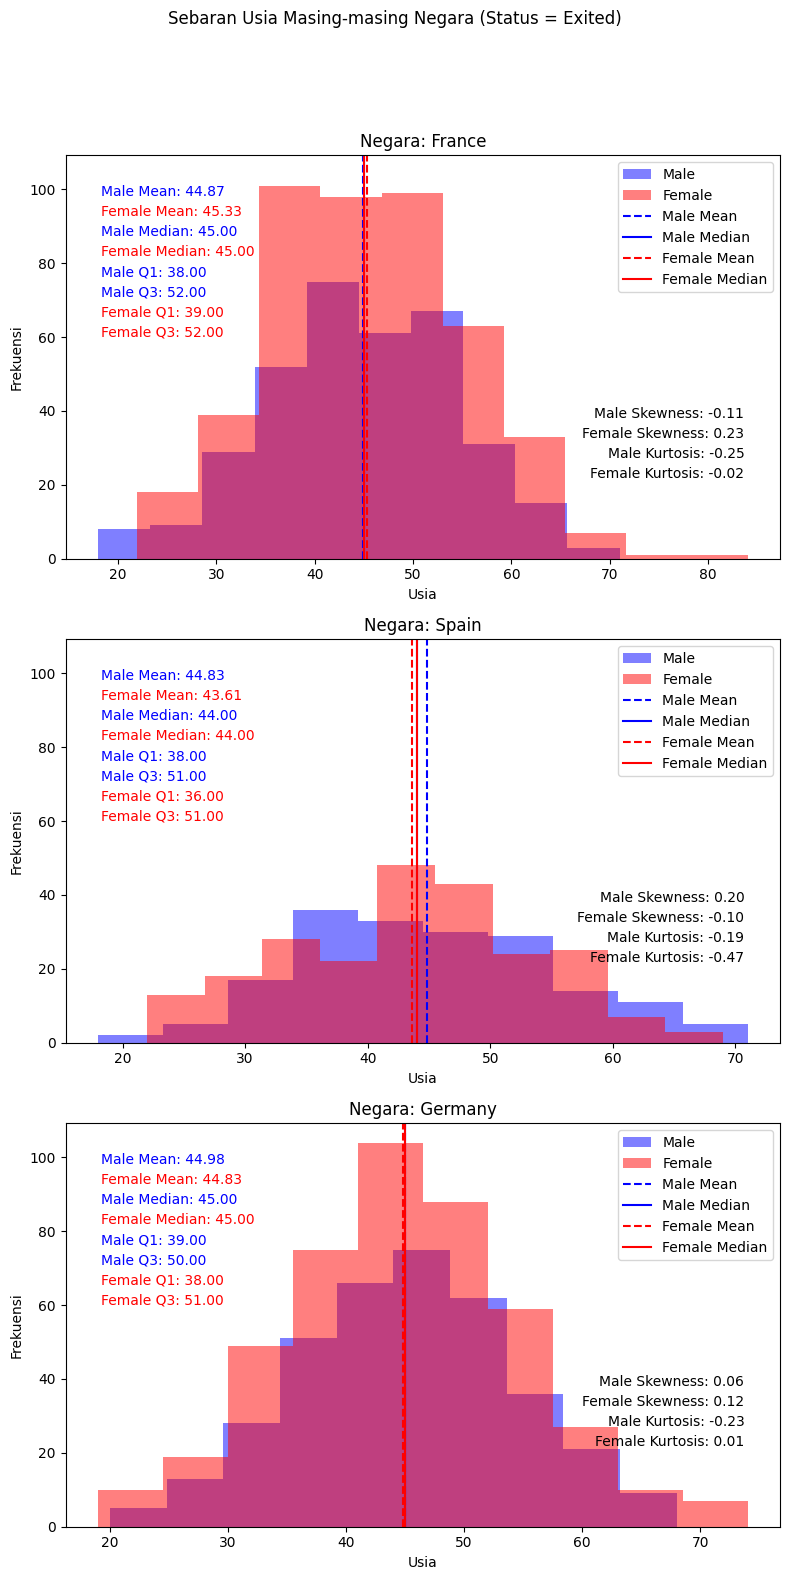

In [34]:
from scipy.stats import skew, kurtosis

negara = df['Geography'].unique()

#mengatur ukuran, letak, dan posisi gambar plot
fig, axs = plt.subplots(len(negara), 1, figsize=(8, 5 * len(negara)), sharey=True)

#melakukan plot histogram terpisah untuk setiap negara dengan status Exited setiap nasabah
for i, country in enumerate(negara):
    a_male = df[(df['Geography'] == country) & (df['Status'] == 'Exited') & (df['Gender'] == 'Male')]
    a_female = df[(df['Geography'] == country) & (df['Status'] == 'Exited') & (df['Gender'] == 'Female')]
    axs[i].hist(a_male['Age'], bins=10, alpha=0.5, color='blue', label='Male')
    axs[i].hist(a_female['Age'], bins=10, alpha=0.5, color='red', label='Female')
    axs[i].set_xlabel('Usia')
    axs[i].set_ylabel('Frekuensi')
    axs[i].set_title(f'Negara: {country}')
    axs[i].legend()

    #menghitung nilai skewness dan kurtosis
    male_skewness_age = skew(a_male['Age'])
    male_kurtosis_age = kurtosis(a_male['Age'])
    female_skewness_age = skew(a_female['Age'])
    female_kurtosis_age = kurtosis(a_female['Age'])

    #menghitung dan menambahkan garis mean dan median
    axs[i].axvline(a_male['Age'].mean(), color='blue', linestyle='--', linewidth=1.5, label='Male Mean')
    axs[i].axvline(a_male['Age'].median(), color='blue', linestyle='-', linewidth=1.5, label='Male Median')
    axs[i].axvline(a_female['Age'].mean(), color='red', linestyle='--', linewidth=1.5, label='Female Mean')
    axs[i].axvline(a_female['Age'].median(), color='red', linestyle='-', linewidth=1.5, label='Female Median')

    #menambah keterangan nilai mean dan median di pojok kiri atas
    axs[i].legend()
    axs[i].text(0.05, 0.9, f'Male Mean: {a_male["Age"].mean():.2f}', color='blue', transform=axs[i].transAxes)
    axs[i].text(0.05, 0.85, f'Female Mean: {a_female["Age"].mean():.2f}', color='red', transform=axs[i].transAxes)
    axs[i].text(0.05, 0.8, f'Male Median: {a_male["Age"].median():.2f}', color='blue', transform=axs[i].transAxes)
    axs[i].text(0.05, 0.75, f'Female Median: {a_female["Age"].median():.2f}', color='red', transform=axs[i].transAxes)

    #menghitung nilai quartile 1 dan quartile 3 dan menambahkan keterangan nilainya
    axs[i].text(0.05, 0.7, f'Male Q1: {a_male["Age"].quantile(0.25):.2f}', color='blue', transform=axs[i].transAxes)
    axs[i].text(0.05, 0.65, f'Male Q3: {a_male["Age"].quantile(0.75):.2f}', color='blue', transform=axs[i].transAxes)
    axs[i].text(0.05, 0.6, f'Female Q1: {a_female["Age"].quantile(0.25):.2f}', color='red', transform=axs[i].transAxes)
    axs[i].text(0.05, 0.55, f'Female Q3: {a_female["Age"].quantile(0.75):.2f}', color='red', transform=axs[i].transAxes)

    #menambahkan keterangan nilai skewness dan kurtosis di kanan bawah
    axs[i].text(0.95, 0.35, f'Male Skewness: {male_skewness_age:.2f}', transform=axs[i].transAxes, ha='right')
    axs[i].text(0.95, 0.30, f'Female Skewness: {female_skewness_age:.2f}', transform=axs[i].transAxes, ha='right')
    axs[i].text(0.95, 0.25, f'Male Kurtosis: {male_kurtosis_age:.2f}', transform=axs[i].transAxes, ha='right')
    axs[i].text(0.95, 0.20, f'Female Kurtosis: {female_kurtosis_age:.2f}', transform=axs[i].transAxes, ha='right')
#menambahkan judul untuk setiap plot dan mengatur layout
plt.suptitle('Sebaran Usia Masing-masing Negara (Status = Exited)', y=1.05)
plt.tight_layout()
plt.show()


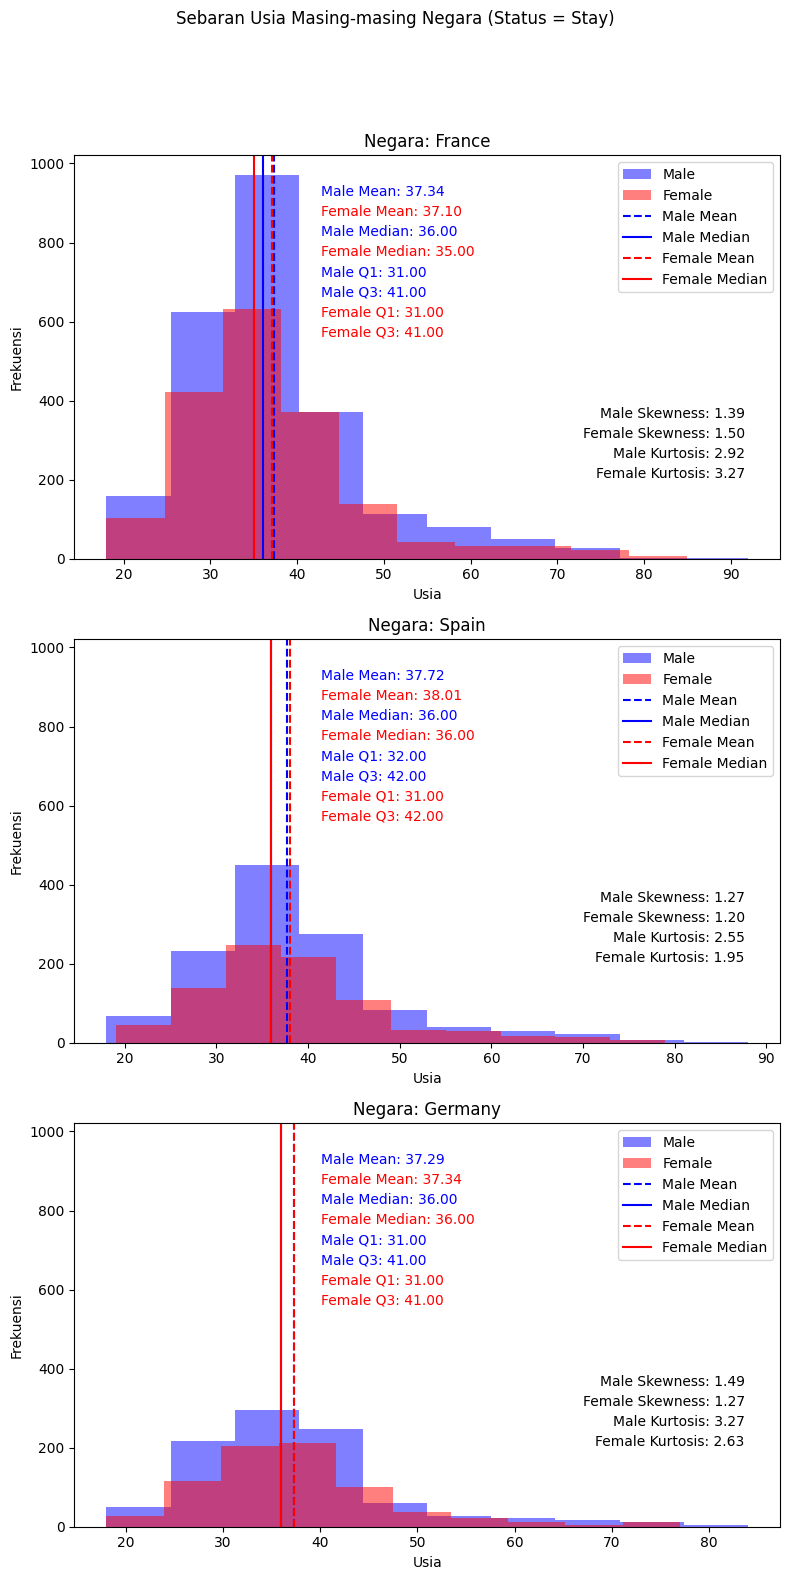

In [35]:
from scipy.stats import skew, kurtosis

negara = df['Geography'].unique()

#mengatur ukuran, letak, dan posisi gambar plot
fig, axs = plt.subplots(len(negara), 1, figsize=(8, 5 * len(negara)), sharey=True)

#melakukan plot histogram terpisah untuk setiap negara dengan status Exited setiap nasabah
for i, country in enumerate(negara):
    a_male_stay = df[(df['Geography'] == country) & (df['Status'] == 'Stay') & (df['Gender'] == 'Male')]
    a_female_stay = df[(df['Geography'] == country) & (df['Status'] == 'Stay') & (df['Gender'] == 'Female')]
    axs[i].hist(a_male_stay['Age'], bins=10, alpha=0.5, color='blue', label='Male')
    axs[i].hist(a_female_stay['Age'], bins=10, alpha=0.5, color='red', label='Female')
    axs[i].set_xlabel('Usia')
    axs[i].set_ylabel('Frekuensi')
    axs[i].set_title(f'Negara: {country}')
    axs[i].legend()

    #menghitung nilai skewness dan kurtosis
    male_skewness_age_stay = skew(a_male_stay['Age'])
    male_kurtosis_age_stay = kurtosis(a_male_stay['Age'])
    female_skewness_age_stay = skew(a_female_stay['Age'])
    female_kurtosis_age_stay = kurtosis(a_female_stay['Age'])

    #menghitung dan menambahkan garis mean dan median
    axs[i].axvline(a_male_stay['Age'].mean(), color='blue', linestyle='--', linewidth=1.5, label='Male Mean')
    axs[i].axvline(a_male_stay['Age'].median(), color='blue', linestyle='-', linewidth=1.5, label='Male Median')
    axs[i].axvline(a_female_stay['Age'].mean(), color='red', linestyle='--', linewidth=1.5, label='Female Mean')
    axs[i].axvline(a_female_stay['Age'].median(), color='red', linestyle='-', linewidth=1.5, label='Female Median')

    #menambah keterangan nilai mean dan median di pojok kiri atas
    axs[i].legend()
    axs[i].text(0.35, 0.9, f'Male Mean: {a_male_stay["Age"].mean():.2f}', color='blue', transform=axs[i].transAxes)
    axs[i].text(0.35, 0.85, f'Female Mean: {a_female_stay["Age"].mean():.2f}', color='red', transform=axs[i].transAxes)
    axs[i].text(0.35, 0.8, f'Male Median: {a_male_stay["Age"].median():.2f}', color='blue', transform=axs[i].transAxes)
    axs[i].text(0.35, 0.75, f'Female Median: {a_female_stay["Age"].median():.2f}', color='red', transform=axs[i].transAxes)

    #menghitung nilai quartile 1 dan quartile 3 dan menambahkan keterangan nilainya
    axs[i].text(0.35, 0.7, f'Male Q1: {a_male_stay["Age"].quantile(0.25):.2f}', color='blue', transform=axs[i].transAxes)
    axs[i].text(0.35, 0.65, f'Male Q3: {a_male_stay["Age"].quantile(0.75):.2f}', color='blue', transform=axs[i].transAxes)
    axs[i].text(0.35, 0.6, f'Female Q1: {a_female_stay["Age"].quantile(0.25):.2f}', color='red', transform=axs[i].transAxes)
    axs[i].text(0.35, 0.55, f'Female Q3: {a_female_stay["Age"].quantile(0.75):.2f}', color='red', transform=axs[i].transAxes)

    #menambahkan keterangan nilai skewness dan kurtosis di kanan bawah
    axs[i].text(0.95, 0.35, f'Male Skewness: {male_skewness_age_stay:.2f}', transform=axs[i].transAxes, ha='right')
    axs[i].text(0.95, 0.30, f'Female Skewness: {female_skewness_age_stay:.2f}', transform=axs[i].transAxes, ha='right')
    axs[i].text(0.95, 0.25, f'Male Kurtosis: {male_kurtosis_age_stay:.2f}', transform=axs[i].transAxes, ha='right')
    axs[i].text(0.95, 0.20, f'Female Kurtosis: {female_kurtosis_age_stay:.2f}', transform=axs[i].transAxes, ha='right')
#menambahkan judul untuk setiap plot dan mengatur layout
plt.suptitle('Sebaran Usia Masing-masing Negara (Status = Stay)', y=1.05)
plt.tight_layout()
plt.show()


Berdasarkan hasil filtering data dan plot grafik diagram batang di atas, ditemukan bahwa

1. Untuk di negara France, rentang usia nasabah Male dengan status Exited ada di 38-52 tahun dengan nilai mean 44.87 tahun. Sementara rentang usia nasabah Female dengan status Exited ada di 39-52 tahun dengan nilai mean 45.33 tahun.
2. Untuk di negara Germany, rentang usia nasabah Male dengan status Exited ada di 39-50 tahun dengan nilai mean 44.98 tahun. Sementara rentang usia nasabah Female dengan status Exited ada di 38-51 tahun dengan nilai mean 44.98 tahun
3. Untuk di negara Spain, rentang usia nasabah Male dengan status Exited ada di 38-51 tahun dengan nilai mean 44.83 tahun. Sementara rentang usia nasabah Female dengan status Exited ada di 36-51 tahun dengan nilai mean 43.61 tahun
4. Untuk di negara France, rentang usia nasabah Male dengan status Stay ada di 31-41 tahun dengan nilai mean 37.34 tahun. Sementara rentang usia nasabah Female dengan status Exited ada di 39-52 tahun dengan nilai mean 45.33 tahun.
5. Untuk di negara Germany, rentang usia nasabah Male dengan status Exited ada di 31-41 tahun dengan nilai mean 37.29 tahun. Sementara rentang usia nasabah Female dengan status Exited ada di 31-41 tahun dengan nilai mean 37.34 tahun
6. Untuk di negara Spain, rentang usia nasabah Male dengan status Exited ada di 32-42 tahun dengan nilai mean 37.72 tahun. Sementara rentang usia nasabah Female dengan status Exited ada di 31-42 tahun dengan nilai mean 38.01 tahun

Dari hasil di atas, dapat diketahui bahwa sebaran usia untuk status Exited cenderung lebih tua dibandingkan untuk status Stay. Sehingga dapat disimpulkan bahwa nasabah di rentang usia 30-42 tahun masih memilih untuk stay, sedangkan rentang usia 36-51 tahun lebih cenderung memilih Exited


#6. Bagaimana keterkaitan setiap faktor terhadap keluarnya nasabah?

In [46]:
#melakukan drop pada kolom yang tidak diperlukan untuk melihat korelasi antar kolom
kordf = df.drop(['CustomerId', 'RowNumber'], axis=1)

<ipython-input-47-1da7029b5fd9>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(kordf.corr(),annot=True)


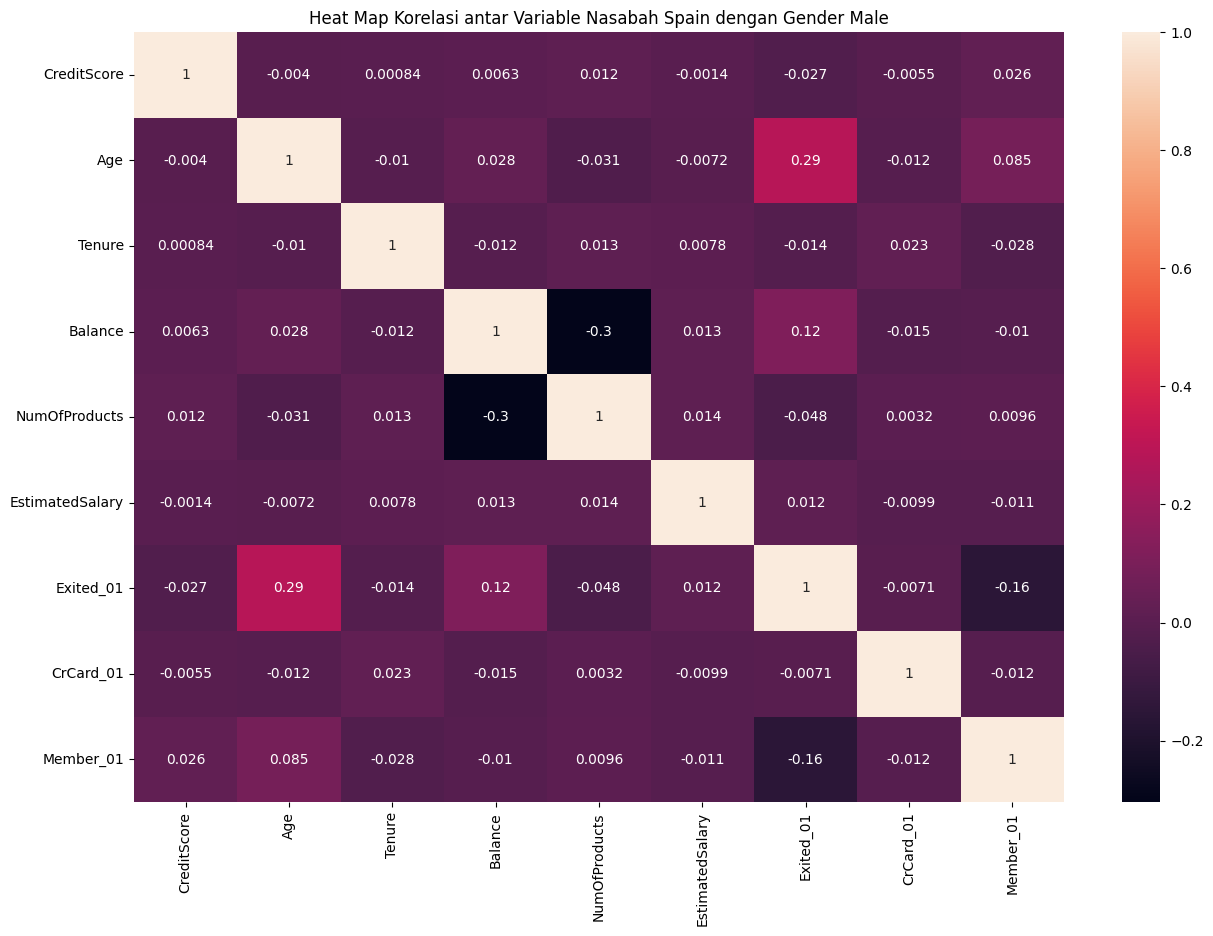

In [47]:
#melakukan plot heatmap dan mengatur ukuran gambar dan judul plot
plt.figure(figsize=(15,10))
sns.heatmap(kordf.corr(),annot=True)
plt.title('Heat Map Korelasi antar Variable Nasabah Spain dengan Gender Male')
plt.show()


Berdasarkan hasil plot heatmap di atas, dapat dilihat bahwa pada kolom Exited_01 memiliki korelasi yang paling kuat dengan faktor usia nasabah, yaitu sebesar 0.29, dan korelasi yang cukup kuat dengan faktor EstimatedSalary dan Balance nasabah, sebesar 0.12.

Dengan demikian dapat disimpulkan bahwa faktor usia merupakan faktor yang paling kuat untuk alasan Exited nasabah, selain itu faktor EstimatedSalary dan Balance juga menjadi faktor yang bisa diperhitungkan.

#7. Bagaimana arah hubungan setiap variable faktor dengan faktor keluarnya nasabah?

In [58]:
#mengambil list dari tabel describe dan melakukan transpose untuk diambil indexnya
listdf = kordf.describe().transpose().index

In [59]:
#mengambil index dan mengubah sebagai list
listdf1 = listdf.tolist()
listdf1

['CreditScore',
 'Age',
 'Tenure',
 'Balance',
 'NumOfProducts',
 'EstimatedSalary',
 'Exited_01',
 'CrCard_01',
 'Member_01']

In [60]:
#menghapus kolom exited_01 dan mengukur korelasi variable kolom-kolom kordf terhadap kolom exited_01
listdf1.remove('Exited_01')
listdf1_val=[]
for i in listdf1:
    listdf1_val.append(np.corrcoef(kordf[i], kordf['Exited_01'])[0,1])


In [61]:
listdf1_val

[-0.027093539754657746,
 0.28532303783506774,
 -0.014000612253444577,
 0.1185327687716338,
 -0.04781986494944055,
 0.012096861026844645,
 -0.0071377656030389165,
 -0.15612827818890512]

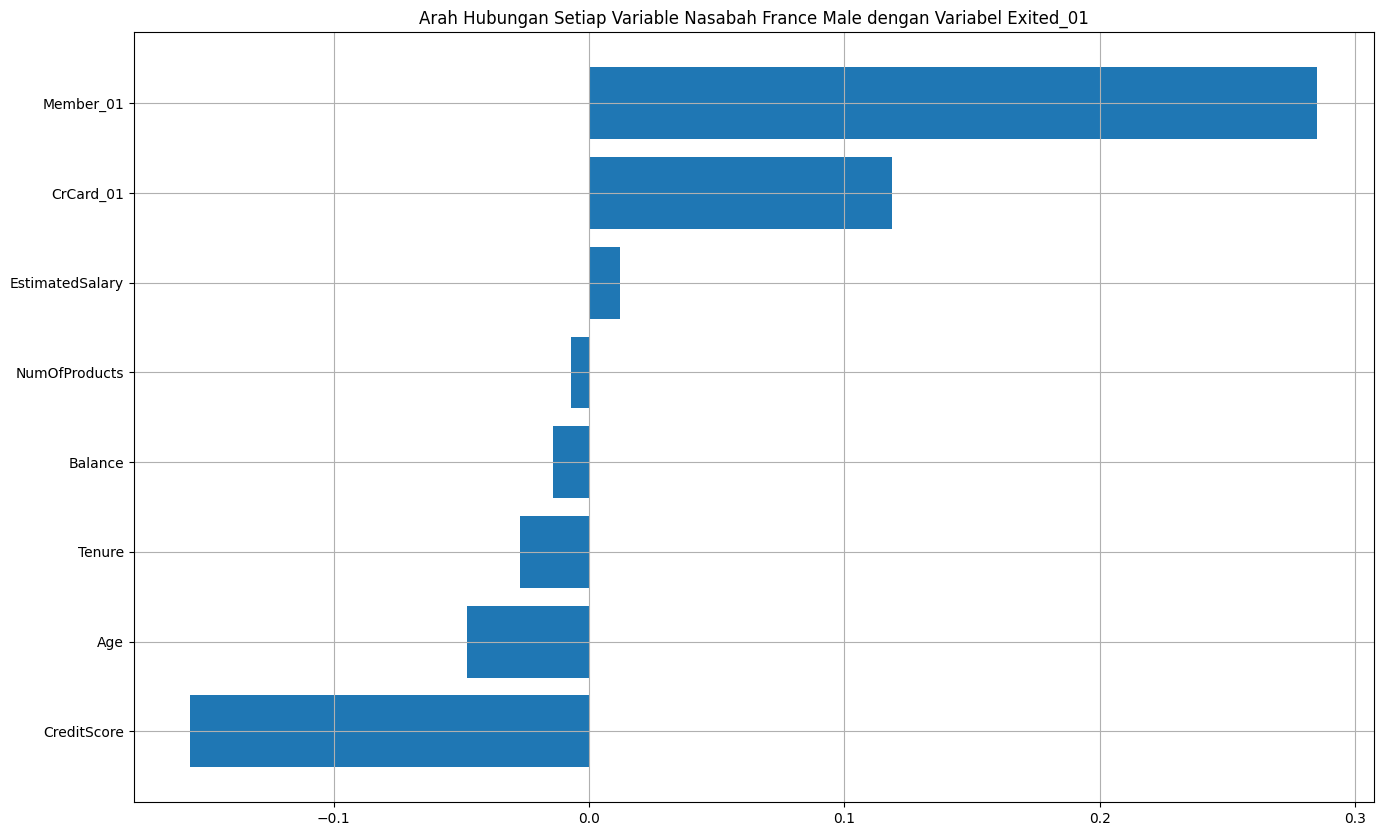

In [62]:
listdf1_val.sort()
fig,ax=plt.subplots(figsize=(16,10))
ax.barh(listdf1,listdf1_val)
plt.title('Arah Hubungan Setiap Variable Nasabah France Male dengan Variabel Exited_01')
plt.grid(True)


Berdasarkan hasil perhitungan korelasi koefisien variable Exited_01 dengan variable-variable lain yang ada pada nasabah di atas, dapat dilihat bahwa Credit Score dan Age memiliki hubungan yang kuat berkebalikan. Dengan demikian dapat diketahui bahwa semakin besar nilai credit score nasabah, dan semakin tua usianya, maka semakin tidak memilih untuk Exited.

#8. Apakah pengaruh credit score nasabah memiliki pengaruh yang signifikan terhadap alasan keluarnya nasabah?

In [77]:
#mengambil data nasabah yang exited dan yang stay
dfEX = df[df['Status']=='Exited']
df_crEX = dfEX['CreditScore']
dfS = df[df['Status'] == 'Stay']
df_crS = dfS['CreditScore']
np.random.seed(2000)
t_stat,p_val_FM1 = stats.ttest_rel(df_crEX.sample(2000),df_crS.sample(2000))
print('P-value:',p_val_FM1)

P-value: 0.029541166437833593


Pada analisa statistik inferensial berikut, saya mengambil data credit score nasabah dengan status Exited dan Stay untuk dibandingkan. Sehingga saya membuat analisa Paired Test karena membandingkan 2 kategori variable yang dependent dalam 1 pelayanan bank yang sama.

Pada kasus ini, H0 yang ditetapkan adalah bahwa nilai creditscore nasabah yang Stay memiliki hubungan yang signifikan terhadap nilai creditscore nasabah yang Exited.

Sehingga, dengan nilai p-value sebesar 0.029, maka H0 ditolak, sehingga dapat disimpulkan bahwa nilai creditscore nasabah yang Stay tidak memiliki hubungan signifikan dengan nilai creditscore nasabah yang Exited


---



---



#KESIMPULAN

Berdasarkan analisis data yang telah dilakukan, berikut adalah kesimpulan dari poin-poin hasil yang telah disajikan:

1. Gender dan Status:

  Di setiap negara, gender male mendominasi jumlah nasabah secara keseluruhan, tetapi gender female mendominasi nasabah yang statusnya "Exited". Secara umum, lebih banyak nasabah female yang keluar ("Exited") daripada nasabah male di setiap negara.
2. Jumlah Nasabah:

  Jumlah nasabah female yang keluar ("Exited") lebih tinggi daripada nasabah male di setiap negara. Jumlah nasabah male yang tetap ("Stay") lebih tinggi daripada nasabah female di setiap negara.
3. Credit Card:

  Lebih banyak nasabah yang keluar ("Exited") yang memiliki kartu kredit dibandingkan yang tidak memiliki kartu kredit di setiap negara.
4. Keanggotaan (Member):

  Lebih banyak nasabah yang keluar ("Exited") yang bukan merupakan member dibandingkan yang merupakan member di setiap negara.
5. Usia:

  Rentang usia nasabah yang keluar ("Exited") cenderung lebih tinggi daripada nasabah yang tetap ("Stay"). Nasabah dengan rentang usia 30-42 tahun lebih cenderung untuk tetap ("Stay"), sedangkan nasabah dengan rentang usia 36-51 tahun lebih cenderung untuk keluar ("Exited").
6. Korelasi:

  Faktor usia nasabah memiliki korelasi yang kuat dengan keputusan keluar ("Exited"), diikuti oleh faktor estimated salary dan balance nasabah.
  Faktor credit score dan usia nasabah memiliki hubungan yang berkebalikan. Semakin tinggi credit score dan semakin tua usia nasabah, semakin kecil kemungkinan nasabah tersebut keluar ("Exited").
7. Uji Inferensial:

  Berdasarkan uji paired test, tidak terdapat hubungan signifikan antara nilai credit score nasabah yang tetap ("Stay") dengan nilai credit score nasabah yang keluar ("Exited").

Dengan demikian, dapat disimpulkan bahwa faktor-faktor seperti gender, keanggotaan, keberadaan kartu kredit, usia, dan faktor-faktor terkait korelasi memiliki pengaruh terhadap keputusan nasabah untuk keluar atau tetap di bank. Namun, faktor credit score nasabah tidak memiliki pengaruh signifikan terhadap keputusan keluar atau tetap. Berdasarkan hal ini, dapat disimpulkan berdasarkan data bahwa faktor usia merupakan faktor yang paling kuat menjadi penyebab keluarnya nasabah.